In [20]:
# Here is where we import all the things we need

import numpy as np
# For image processing and displaying
import matplotlib.pyplot as plt
# Special function to resize an image
from scipy.misc import imresize

%matplotlib inline

In [21]:
# load an image
img = plt.imread('zero.jpg')

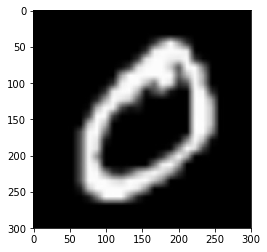

In [22]:
plt.imshow(img)

In [23]:
# Resize the image to 28x28
img = imresize(img, (28,28))
img.shape

(28, 28, 3)

In [24]:
# This function converts RGB values to grayscale (1/3rd of each color)
# This is a somewhat silly way to do this but perhaps it's a useful demonstration
# of reshaping data
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [25]:
# Run the conversion
gray = rgb2gray(img)

In [26]:
# Check the shape
gray.shape

(28, 28)

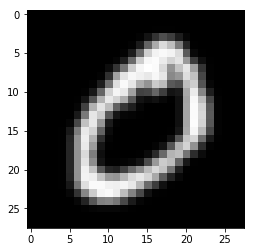

In [27]:
# Let's look at the image again to be sure
plt.imshow(gray,cmap = plt.get_cmap('gray'))

In [28]:
# map values to between 0 and 1
gray /= 255

In [29]:
# Let's get what we need from keras
import keras
from keras.models import load_model

Using TensorFlow backend.


In [30]:
# Load the trained model
model = load_model('model.h5')

In [31]:
# Reshap the data
# This is one 28x28 image with one channel (gray)
# 1 x 28 x 28 x 1
inputs = gray.reshape(1, 28, 28, 1)
inputs.shape

(1, 28, 28, 1)

In [34]:
# What digit is it?
model.predict_classes(inputs,batch_size=1, verbose=1)

1/1 [==============================] - 0s


array([0])

In [35]:
# Look at the probabilities
model.predict(inputs,batch_size=1, verbose=1)

1/1 [==============================] - 0s


array([[  9.99790490e-01,   1.21384085e-06,   1.43691832e-05,
          3.56713372e-07,   1.99092838e-07,   2.85336398e-07,
          5.29850786e-06,   8.17694740e-07,   1.01113910e-05,
          1.76870701e-04]], dtype=float32)